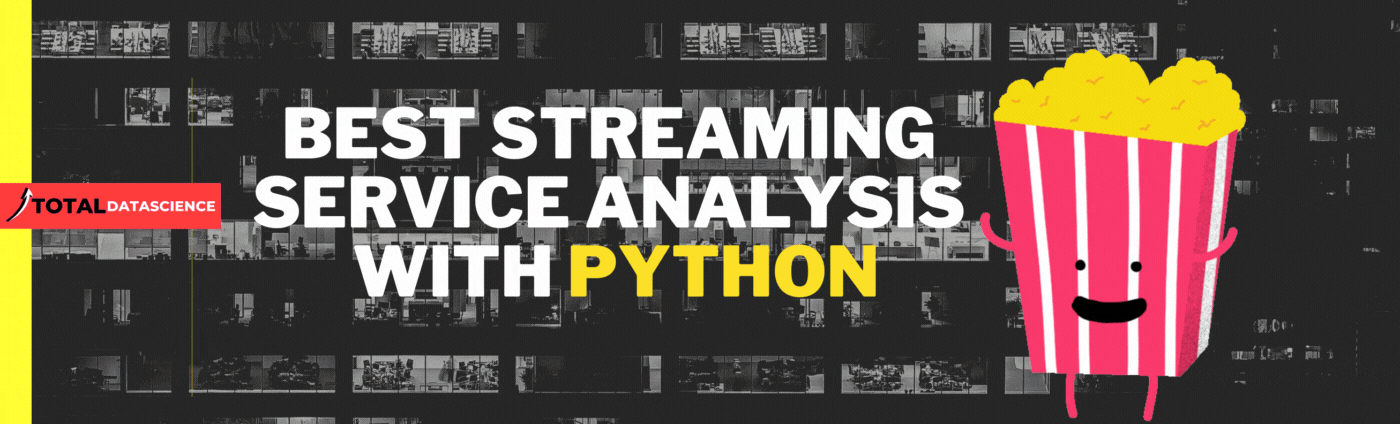

## Author: **MrBriit**

[Click here to follow me on Linkedin](https://www.linkedin.com/in/mrbriit/)

<br>

[Subscrice Youtube and Click on Notification button for more free tutorials and live sessons.](https://www.youtube.com/channel/UC7YlhTyLxk_B1ZcY8CUpCVQ?sub_confirmation=1)

<br>

<br>


**IMPORTANT**

[Related Tutorials](https://www.udemy.com/course/the-full-stack-data-scientist-bootcamp/)


<br>

#**Best Streaming Service Analysis**

In this project, we will analyse the main streamming services like Netflix, Amazon Prime Video, Disney+, Hulu.

<br>

**Import the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.express as px 
# import cufflinks as cf
# cf.go_offline()
# import plotly.graph_objects as go
# fig = go.Figure()

# from wordcloud import WordCloud

%matplotlib inline

In [ ]:
df= pd.read_csv('/content/moviestreams.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Rotten Tomatoes is an American review-aggregation website for film and television.

In [ ]:
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [ ]:
df.drop(['Unnamed: 0','ID',], axis=1, inplace = True)
cols = df.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

**Check For Missing Values**

In [ ]:
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

As we can see, there are missing values in the some of the columns. We will not drop these columns for now.

NOTE: Dropping a value in your dataset should be the last option to consider. There are better ways to deal with missing values in your dataset.

There is a detail and well explained tutorial on dealing with missing values and other featuring engineering techniques in [this Udemy tutorial.](https://www.udemy.com/course/python-data-analysis-for-data-science-machine-learning/?referralCode=DCEF9B42537C51AF30AA)

<br>

## Let's remove the **'+'** sign attached to the values in the **Age** column.

In [ ]:
df['Age']

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [ ]:
age_map = {'18+' : 18, '7+' : 7, '13+': 13, 'all' : 0, '16+' : 16}
df['AgeCopy'] = df['Age'].map(age_map)
df['AgeCopy']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: AgeCopy, Length: 16744, dtype: float64

<br>

## Let's remove the **'%'** sign attached to the values in the **Rotten Tomatoes** column.

In [ ]:
df['New_Rotten_Tomatoes'] = df['Rotten Tomatoes'].str.replace("%","")
for i in df['New_Rotten_Tomatoes']:
  if i==str:
    i.astype(int)
df['New_Rotten_Tomatoes']

0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rotten_Tomatoes, Length: 16744, dtype: object

<br>
<br>

#**Visualisations**

#What Is The Number Of Movies For Each Age Group?

In [ ]:
# !pip install plotly==4.14.1

In [ ]:

# # JUPYTER NOTEBOOK
# !pip install "notebook>=5.3" "ipywidgets>=7.2"

# # JUPYTER LAB

# !pip install jupyterlab "ipywidgets>=7.5"

In [ ]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

<br>

<br>

**Top 10 languages in Streaming Services**

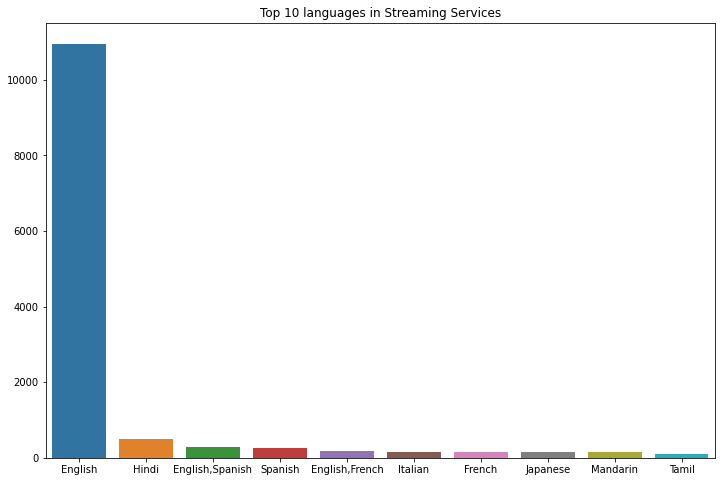

In [ ]:
#counting and assigning the 10 top values to a variable
languages = df.Language.value_counts().head(10)
 
plt.figure(figsize=(12,8))
plt.title('Top 10 languages in Streaming Services')
sns.barplot(x=languages.index, y=languages.values)

In [ ]:
from IPython.display import HTML
import plotly.express as px
fig = px.pie(df, 
             values=languages.values, 
             names=languages.index, 
             title='Top 10 languages in Streaming Services',
             height=600)
HTML(fig.to_html())

<br>

<br>

**Number of Movies in specific age group in All services**

In [ ]:
from IPython.display import HTML
import plotly.express as px
fig = px.bar(df, 
             x=df['Age'].value_counts().index, 
             y=df['Age'].value_counts(),
             title="Number of Movies in specific age group in All services",
             text=df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

**Number of Movies in specific age group in Netflix**

In [ ]:
from IPython.display import HTML
import plotly.express as px
netflix_df=df[df['Netflix']==1]
fig = px.bar(netflix_df, 
             x=netflix_df['Age'].value_counts().index, 
             y=netflix_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Netflix",
             text=netflix_df['Age'].value_counts(), 
             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

**Number of Movies in specific age group in Amazon Prime Video**

In [ ]:
from IPython.display import HTML
import plotly.express as px
prime_df=df[df['Prime Video']==1]
fig = px.bar(netflix_df, 
             x=prime_df['Age'].value_counts().index, 
             y=prime_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Amazon Prime Video",
             text=prime_df['Age'].value_counts(), 
             height=600)
fig.update_traces(marker_color='lightsalmon',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

**Number of Movies in specific age group in Disney+**

In [ ]:
from IPython.display import HTML
import plotly.express as px
Disney_df=df[df['Disney+']==1]
fig = px.bar(netflix_df, 
             x=Disney_df['Age'].value_counts().index, 
             y=Disney_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Disney+ Video",
             text=Disney_df['Age'].value_counts(), 
             height=600)
fig.update_traces(marker_color='red',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

**Number of Movies in specific age group in Hulu**

In [ ]:
from IPython.display import HTML
import plotly.express as px
Hulu_df=df[df['Hulu']==1]
fig = px.bar(netflix_df, 
             x=Hulu_df['Age'].value_counts().index, 
             y=Hulu_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Hulu Video",
             text=Hulu_df['Age'].value_counts(), 
             height=600)
fig.update_traces(marker_color='black',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

#**Rotten Tomatoes Score**

A Tomatometer score is calculated for a movie or TV show after it receives at least five reviews. When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.

Rotten Tomatoes gives films a score out of 100 based on the averaged reviews of professional film critics. If a film gets a rating of 60 or more it gets a 'fresh' red tomato on the site. Less than 60 and it gets a rotten tomato.

In [ ]:
from IPython.display import HTML
import plotly.express as px

fig = px.bar(df, 
             x=df['Rotten Tomatoes'].value_counts().index, 
             y=df['Rotten Tomatoes'].value_counts(),
             title="Overall Rotten Tomato Ratings",
             text=df['Rotten Tomatoes'].value_counts(), 
             height=600)
fig.update_traces(marker_color='blue',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

##**Rotten Tomato Ratings For Each Services**

In [ ]:
rt_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [netflix_df['Rotten Tomatoes'].value_counts()[0], 
                                                             prime_df['Rotten Tomatoes'].value_counts()[0],
                                                             Disney_df['Rotten Tomatoes'].value_counts()[0],
                                                             Hulu_df['Rotten Tomatoes'].value_counts()[0]]})
rt_scores.head()

,Streaming Service,Rotten Tomato Score
0,Prime Video,130
1,Hulu,257
2,Disney+,19
3,NetFlix,18


In [ ]:
# rt_scores.sort_values(ascending=False, by="Rotten Tomato Score").iplot(kind='bar', x='Streaming Service', y='Rotten Tomato Score', 
#                            color='Violet', xTitle="Streaming Service", 
#                            yTitle="Count of Movies with Score of 100%", 
#                            title="Streaming Service with 100% Rotten Tomato Score")

In [ ]:
sorted_rt_score=rt_scores.sort_values(ascending=False, by="Rotten Tomato Score")
sorted_rt_score

,Streaming Service,Rotten Tomato Score
1,Hulu,257
0,Prime Video,130
2,Disney+,19
3,NetFlix,18


In [ ]:
fig = px.bar(sorted_rt_score, 
             x=sorted_rt_score['Streaming Service'], 
             y=sorted_rt_score['Rotten Tomato Score'],
             title="Rotten Tomato Ratings For Each Services",
             text=sorted_rt_score['Rotten Tomato Score'], 
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

We can see that Prime Video has 260 Rotten Tomato Score

#**IMDB Ratings**

In [ ]:
fig = px.bar(df, 
             y=df['IMDb'].value_counts(), 
             x=df['IMDb'].value_counts().index,
             title="Overall IMDb Ratings For All Services",
             text=df['IMDb'].value_counts(), 
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

NB: You can also do the IMDb ratings for each streaming service.

####**Count Of Runtimes Of Movies**

In [ ]:
RuntimeCount=pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(), 
             columns=['Runtime', 'Count'])


RuntimeCount

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
...,...,...
148,144.0,9
149,38.0,9
150,32.0,8
151,9.0,8


In [ ]:
fig = px.bar(df, 
             x=RuntimeCount['Runtime'], 
             y=RuntimeCount['Count'],
             title="Count Of Runtimes Of Movies",
             text=RuntimeCount['Runtime'], 
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Most of the movies have run time of around 90 minutes.

<br>

<br>

**Directors And Their Count Of Movies They Have Directed**

In [ ]:
df['Directors']=df['Directors'].astype(str) #run below code b4 this

In [ ]:
new_data = df[df['Directors'] !=np.nan]
# new_data=df['Directors']
directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
            # print(directors_count[xd])
            # print('========================')
        else:
            directors_count[xd] = 1
            # print(directors_count[xd])

In [ ]:
 DirCount = pd.DataFrame(directors_count.items(), columns=['Director', 'Count'])
 DirCount=DirCount.sort_values(ascending=False, by='Count').head(20)
 DirCount

,Director,Count
56,nan,726
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21


In [ ]:
  DirCount=DirCount.drop(56, axis=0)

  DirCount

,Director,Count
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
1415,Jan Suter,21


In [ ]:
fig = px.bar(DirCount, 
             x=DirCount['Director'], 
             y=DirCount['Count'],
             title="Directors And The Count Of Movies They Have Directed",
             text=DirCount['Count'],
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

We can see from above that Jay Chapman has directed most of the movies.

Below is the list of movies directed by Jay Chapman

In [ ]:
df[df['Directors']=='Jay Chapman'][['Directors','Title','Genres']]

,Directors,Title,Genres
1014,Jay Chapman,Jim Gaffigan: Obsessed,"Documentary,Comedy"
1234,Jay Chapman,Iliza Shlesinger: War Paint,Comedy
1417,Jay Chapman,Tom Segura: Completely Normal,"Documentary,Comedy"
2211,Jay Chapman,Todd Barry: Spicy Honey,Comedy
2331,Jay Chapman,Craig Ferguson: Tickle Fight,Comedy
2393,Jay Chapman,Colin Quinn: Unconstitutional,Comedy
2447,Jay Chapman,Lucas Brothers: On Drugs,Comedy
2523,Jay Chapman,D.L. Hughley: Contrarian,Comedy
2636,Jay Chapman,D.L. Hughley: Clear,Comedy
2721,Jay Chapman,Moshe Kasher: Live in Oakland,Comedy


###**Exploring Genres**

In [ ]:
genres_= dict(df['Genres'].value_counts())
count_genres = dict()
for g,count in genres_.items():
    g = g.split(",")
    for i in g:
        if i in count_genres.keys():
            count_genres[i] = count_genres.get(i)+1
        else:
            count_genres[i] = 1

In [ ]:
count_genres_df = pd.DataFrame(count_genres.items(), columns=['Genre', 'Count'])
count_genres_df

,Genre,Count
0,Drama,868
1,Documentary,249
2,Comedy,654
3,Horror,296
4,Romance,420
5,Thriller,467
6,Action,553
7,Crime,347
8,Music,171
9,Mystery,318


In [ ]:
fig = px.bar(count_genres_df, 
             x=count_genres_df['Genre'], 
             y=count_genres_df['Count'],
             title="Genre And their Counts",
             text=count_genres_df['Count'],
             height=600)
fig.update_traces(marker_color='lightsalmon',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Most of the movies are **Drama** hence it has the highest count.

###**What Are The Top Movies On Each Platform?**

<br>

<br>

**On NetFlix**

In [ ]:
data_netflix_top = netflix_df[netflix_df['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
data_netflix_top

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


In [ ]:
fig = px.bar(data_netflix_top, 
             x=data_netflix_top['Title'], 
             y=data_netflix_top['IMDb'],
             title="Top Movies On Netflix",
             text=data_netflix_top['IMDb'],
             height=800)
fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

<br>

<br>


**On Amazon Prime**

In [ ]:
amz_top = prime_df[prime_df['IMDb']>8.5]
amz_top = amz_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
amz_top

,Title,IMDb
5110,Love on a Leash,9.3
7426,Bounty,9.3
6837,Steven Banks: Home Entertainment Center,9.3
6566,Square One,9.3
7220,"Down, But Not Out!",9.3
...,...,...
5730,George Carlin: You Are All Diseased,8.6
5607,Aruvi,8.6
9004,The Legend of Pancho Barnes and the Happy Bott...,8.6
9098,Yellow Colt,8.6


In [ ]:
fig = px.bar(amz_top, 
             x=amz_top['Title'], 
             y=amz_top['IMDb'],
             title="Top Movies On Amazon Prime",
             text=amz_top['IMDb'],
             height=800)
fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

<br>

<br>


**On Disney+**

In [ ]:
disney_top = Disney_df[Disney_df['IMDb']>8.5]
disney_top = disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
disney_top

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6


In [ ]:
fig = px.bar(disney_top, 
             x=disney_top['Title'], 
             y=disney_top['IMDb'],
             title="Top Movies On Disney+",
             text=disney_top['IMDb'],
             height=800)
fig.update_traces(marker_color='lightblue',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

<br>

<br>


**On Hulu**

In [ ]:
hulu_top = Hulu_df[Hulu_df['IMDb']>8.5]
hulu_top = hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
hulu_top

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3562,Parasite,8.6
3564,The Green Mile,8.6


In [ ]:
fig = px.bar(hulu_top, 
             x=hulu_top['Title'], 
             y=hulu_top['IMDb'],
             title="Top Movies On Hulu",
             text=hulu_top['IMDb'],
             height=800)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

###**ASIGNMENT**



1.   What is the average streaming time on each platform?
2.   What are the movies the were created before 1990?



In [ ]:


!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to html /content/Best_Streaming_Service_Analysis.ipynb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-